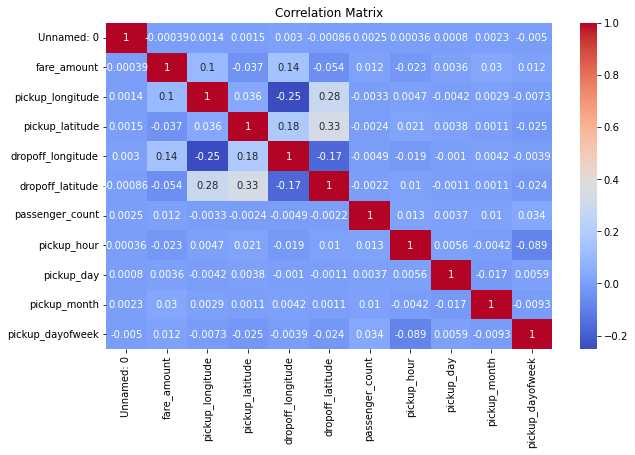

Linear Regression Performance:
Root Mean Squared Error (RMSE): 6.20
R-Squared (R2): 0.06

Random Forest Performance:
Root Mean Squared Error (RMSE): 2.72
R-Squared (R2): 0.82



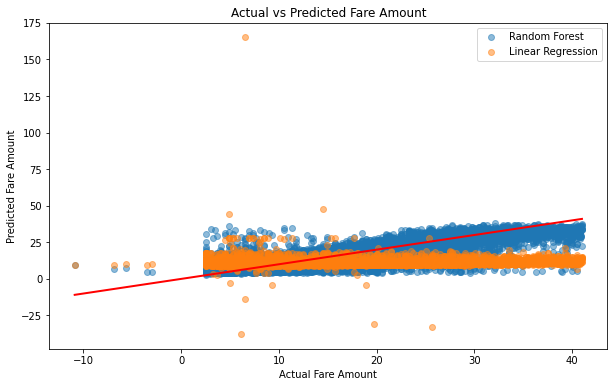

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r'C:\XPrathmesh\College Stuff\Machine Learning Models\uber.csv')


# 1. Pre-process the dataset
# Convert pickup and dropoff datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract features from datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek

# Drop irrelevant columns
df = df.drop(['pickup_datetime', 'key'], axis=1)

# Handle missing values (if any)
df = df.dropna()

# 2. Identify outliers using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df[['fare_amount', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]))
df = df[(z_scores < 3).all(axis=1)]

# 3. Check correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Implement Linear Regression and Random Forest models
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 5. Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Performance:')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-Squared (R2): {r2:.2f}\n')

# Evaluation for Linear Regression
evaluate_model(y_test, y_pred_lr, 'Linear Regression')

# Evaluation for Random Forest
evaluate_model(y_test, y_pred_rf, 'Random Forest')

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.legend()
plt.title('Actual vs Predicted Fare Amount')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.show()


Dataset after preprocessing:
    Unnamed: 0  fare_amount  passenger_count  hour  day  month  day_of_week
0    24238194          7.5                1    19    7      5            3
1    27835199          7.7                1    20   17      7            4
2    44984355         12.9                1    21   24      8            0
3    25894730          5.3                3     8   26      6            4
4    17610152         16.0                5    17   28      8            3


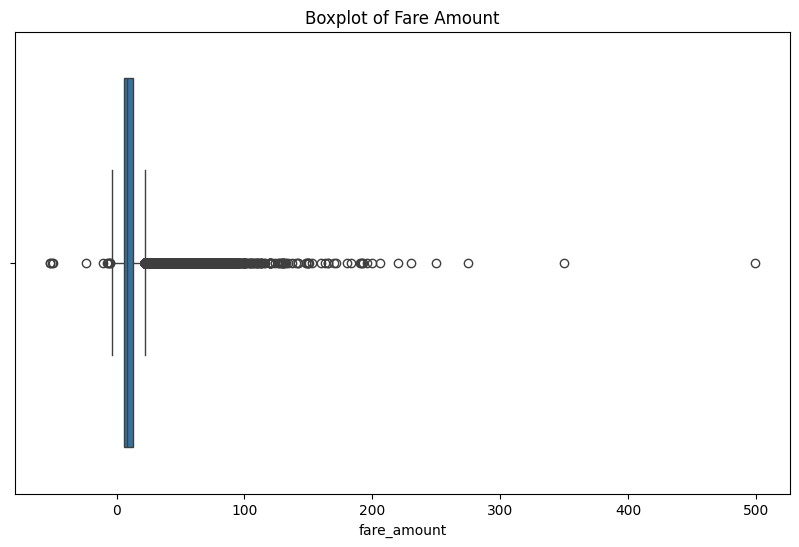

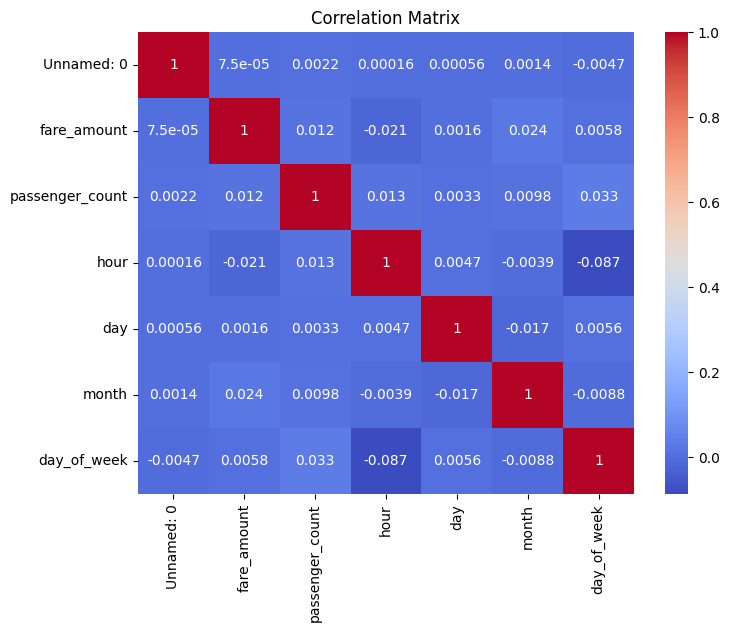

KeyboardInterrupt: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import datetime

# Step 1: Load the dataset
df = pd.read_csv('/content/uber (1).csv')

# Step 2: Data Preprocessing
# Convert 'pickup_datetime' to datetime format and extract features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

# Drop columns that won't be used
df = df.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
              'dropoff_longitude', 'dropoff_latitude', 'key'], axis=1)

# Handle missing values
df.dropna(inplace=True)

print("Dataset after preprocessing:\n", df.head())

# Step 3: Identify Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

# Remove outliers in 'fare_amount'
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]

# Step 4: Check Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Feature and Target Separation
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

# Step 7: Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 8: Evaluate the Models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"R² Score: {r2:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

# Linear Regression Evaluation
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Random Forest Evaluation
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

# Step 9: Plotting Results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6)
plt.plot([0, 100], [0, 100], '--r', label='Ideal Fit')
plt.title('Actual vs Predicted Fare Amount')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.legend()
plt.show()


Dataset after preprocessing:
    Unnamed: 0  fare_amount  passenger_count  hour  day  month  day_of_week
0    24238194          7.5                1    19    7      5            3
1    27835199          7.7                1    20   17      7            4
2    44984355         12.9                1    21   24      8            0
3    25894730          5.3                3     8   26      6            4
4    17610152         16.0                5    17   28      8            3


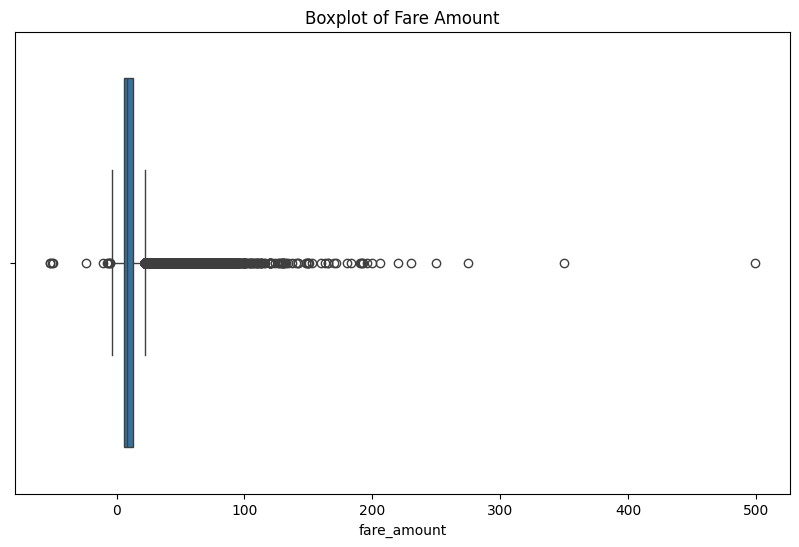

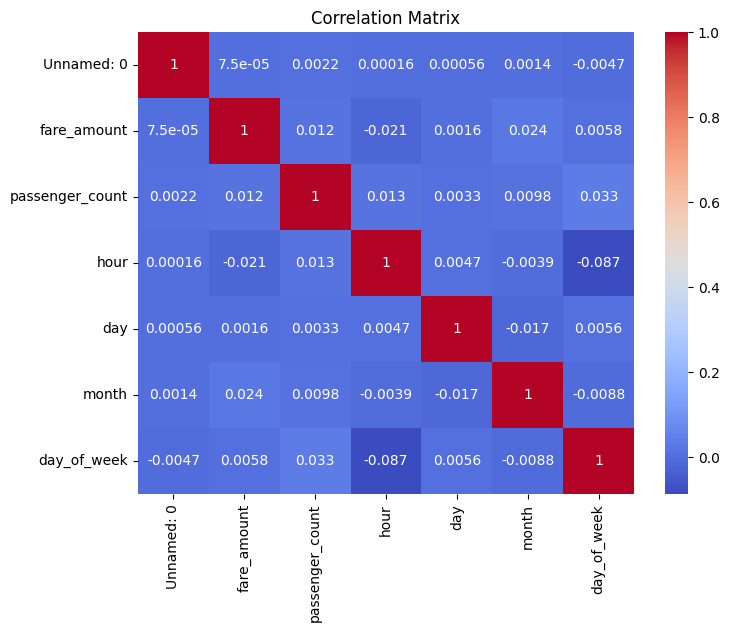


Linear Regression Performance:
R² Score: 0.00
RMSE: 9.35
MAE: 5.92

Random Forest Regression Performance:
R² Score: -0.08
RMSE: 9.72
MAE: 6.43


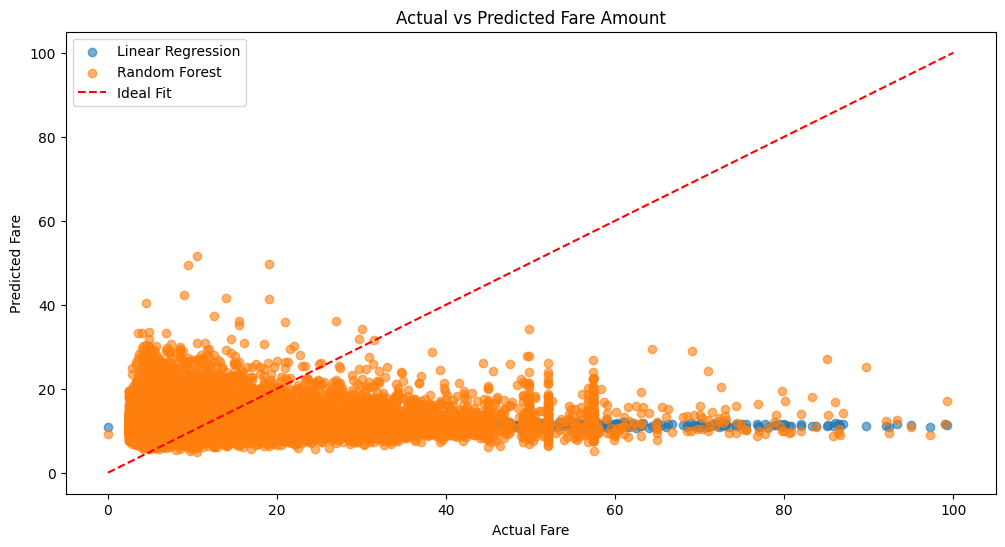

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import datetime

# Step 1: Load the dataset
df = pd.read_csv('/content/uber (1).csv')

# Step 2: Data Preprocessing
# Convert 'pickup_datetime' to datetime format and extract features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

# Drop columns that won't be used
df = df.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
              'dropoff_longitude', 'dropoff_latitude', 'key'], axis=1)

# Handle missing values
df.dropna(inplace=True)

print("Dataset after preprocessing:\n", df.head())

# Step 3: Identify Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

# Remove outliers in 'fare_amount'
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]

# Step 4: Check Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Feature and Target Separation
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

# Step 7: Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 8: Evaluate the Models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"R² Score: {r2:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

# Linear Regression Evaluation
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Random Forest Evaluation
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

# Step 9: Plotting Results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6)
plt.plot([0, 100], [0, 100], '--r', label='Ideal Fit')
plt.title('Actual vs Predicted Fare Amount')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.legend()
plt.show()
